In [12]:

# with Missing data
data2 <- read.csv("Network_Intrusion.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

str(data2)

'data.frame':	25192 obs. of  42 variables:
 $ duration                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ protocol_type              : chr  "tcp" "udp" "tcp" "tcp" ...
 $ service                    : chr  "ftp_data" "other" "private" "http" ...
 $ flag                       : chr  "SF" "SF" "S0" "SF" ...
 $ src_bytes                  : int  491 146 0 232 199 0 0 0 0 0 ...
 $ dst_bytes                  : int  0 0 0 8153 420 0 0 0 0 0 ...
 $ land                       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ wrong_fragment             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ urgent                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hot                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ num_failed_logins          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ logged_in                  : int  0 0 0 1 1 0 0 0 0 0 ...
 $ num_compromised            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ root_shell                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ su_attempted               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ num_ro

In [13]:
# Root Node, decision Node
# Splitting is a process of dividing a node into two or more sub-nodes 
# When a sub-node splits into further sub-nodes, it is called a Decision Node.
# Nodes that do not split is called a Terminal Node or a Leaf. 


# When you remove sub-nodes of a decision node, this process is called Pruning. The opposite of pruning is Splitting.

# A sub-section of an entire tree is called Branch 

# A node, which is divided into sub-nodes is called a parent node of the sub-nodes; whereas the sub-nodes are called the child of the parent node. 

# Regression Tree, Classification Tree





In [14]:

library(dplyr)
df1 <- mutate(data2, classnum = ifelse(class == "normal" ,0 ,
                                    ifelse(class == "anomaly" ,1 ,2                                  
                                                  )))
#head(df1)

df1 <- data.frame(df1$num_failed_logins, 
         df1$logged_in, 
         df1$classnum,
                  df1$count,
                  df1$srv_count
        )
head(df1)

df1.num_failed_logins,df1.logged_in,df1.classnum,df1.count,df1.srv_count
0,0,0,2,2
0,0,0,13,1
0,0,1,123,6
0,1,0,5,5
0,1,0,30,32
0,0,1,121,19


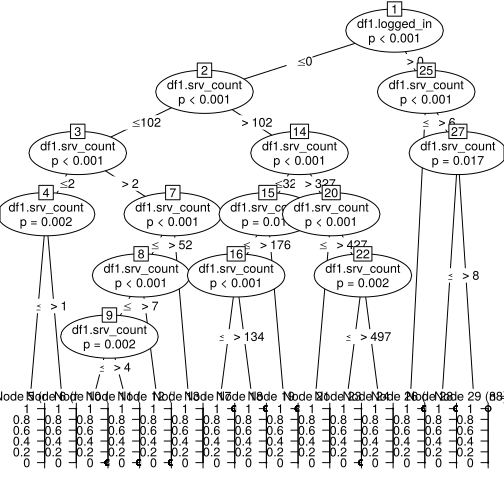

In [15]:
# Give the chart file a name.
#png(file = "decision_tree.png")
library("rpart")
library("party")

data2 <- na.omit(df1)

# Create the tree.
  output.tree <- ctree(
  df1.classnum ~  df1.srv_count + df1.logged_in  ,  data = data2,  controls = ctree_control(maxsurrogate = 1) )

#df1.num_failed_logins + df1.logged_in
# Plot the tree.
plot(output.tree)

# Save the file.
#dev.off()

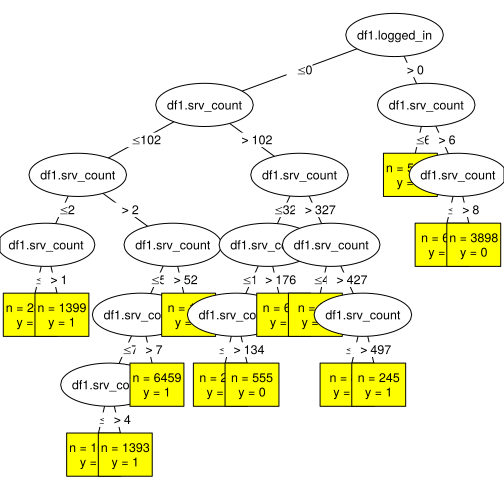

In [16]:
# simpler version of plot
plot(output.tree, type="simple",           # no terminal plots
  inner_panel=node_inner(output.tree,
       abbreviate = FALSE,            # short variable names
       pval = FALSE,                 # no p-values
       id = FALSE),                  # no id of node
  terminal_panel=node_terminal(output.tree, 
       abbreviate = TRUE,
       digits = 0,                   # few digits on numbers
       fill = c("yellow"),            # make box white not grey
       id = FALSE)
   )

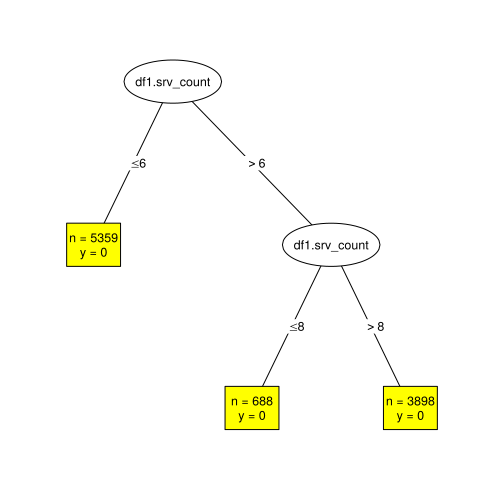

In [17]:
# Create the tree.
data3 <- subset(data2, df1.logged_in > 0)
  output.tree2 <- ctree(
  df1.classnum ~  df1.srv_count + df1.logged_in  ,  data = data3,  controls = ctree_control(maxsurrogate = 1) )

#df1.num_failed_logins + df1.logged_in
# Plot the tree.
# simpler version of plot
plot(output.tree2, type="simple",           # no terminal plots
  inner_panel=node_inner(output.tree2,
       abbreviate = FALSE,            # short variable names
       pval = FALSE,                 # no p-values
       id = FALSE),                  # no id of node
  terminal_panel=node_terminal(output.tree2, 
       abbreviate = TRUE,
       digits = 0,                   # few digits on numbers
       fill = c("yellow"),            # make box white not grey
       id = FALSE)
   )

In [18]:
library(rpart.plot)
rpart.plot(output.tree2)

ERROR: Error: the object passed to prp is not an rpart object


In [0]:
library(randomForest)
fitrm <- randomForest(df1.flag ~  df1.srv_count + df1.logged_in, data2,ntree=500)

summary(fitrm)

# Classification Error Rate
# Gini Index 
# Cross-Entropy: A third alternative, which is similar to the Gini Index, is known as the Cross-Entropy or Deviance:


In [0]:
# BAgging
# Random Forest
# Boosting


In [0]:
print(output.tree)

In [0]:
plot(output.tree, type = "simple")

In [0]:
library(partykit)
print(output.tree)
plot(output.tree)

In [0]:
library("rattle")
fancyRpartPlot(fit, "Decision Tree rpart")

In [0]:
library("rpart")

# grow tree 
fit <- rpart(df1.classnum ~  df1.srv_count + df1.logged_in , method="class", data=data2)

printcp(fit) # display the results 

In [0]:
plotcp(fit) # visualize cross-validation results 
summary(fit) # detailed summary of splits

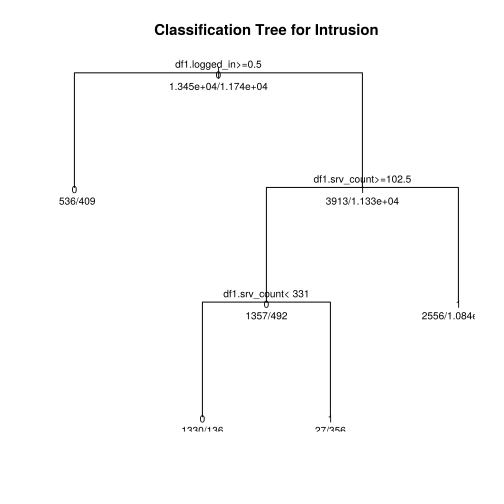

In [20]:
# plot tree 
plot(fit, uniform=TRUE, 
  	main="Classification Tree for Intrusion")
text(fit, use.n=TRUE, all=TRUE, cex=.8)



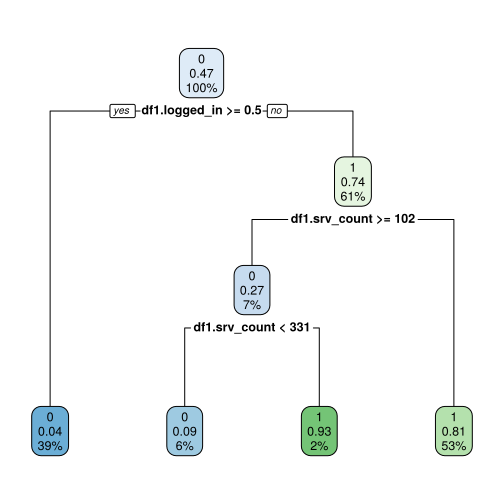

In [21]:
library(rpart.plot)
rpart.plot(fit)

R session is headless; GTK+ not initialized.


Rattle: A free graphical interface for data science with R.
Version 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


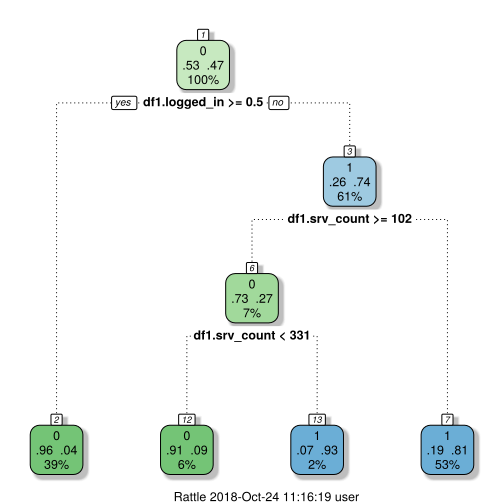

In [22]:
library(rattle)
library(rpart.plot)
library(RColorBrewer)
fancyRpartPlot(fit)

In [38]:
# create attractive postscript plot of tree 
post(fit, file = "tree.ps", 
  	title = "Classification Tree ")

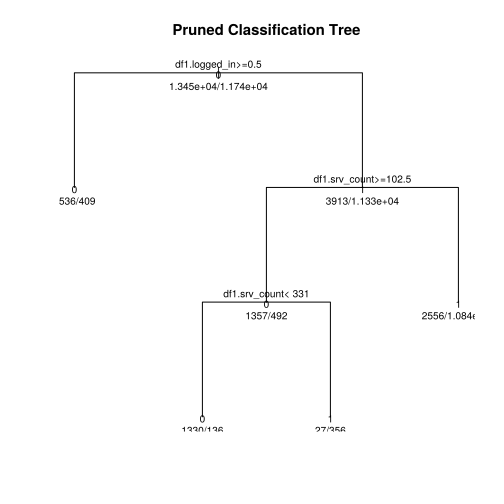

In [22]:
# prune the tree 
pfit<- prune(fit, cp=   fit$cptable[which.min(fit$cptable[,"xerror"]),"CP"])

# plot the pruned tree 
plot(pfit, uniform=TRUE, 
  	main="Pruned Classification Tree")
text(pfit, use.n=TRUE, all=TRUE, cex=.8)

In [1]:
#library(randomForest)


# Warning message in randomForest.default(m, y, ...):
#“The response has five or fewer unique values.  Are you sure you want to do regression?”

#fitrm <- randomForest(df1.count ~  df1.srv_count + df1.logged_in, df1, ntree=500)

#summary(fitrm)